# PART 1: Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import ipywidgets as widgets
from IPython.display import display, clear_output


# PART 2: Loading and Initial Data Exploration

In [67]:
df=pd.read_csv('creditcard.csv')


In [68]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [69]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [70]:
# Counting NaN or missing values in each column (Checks for missing values in the dataset.)
nan_values = df.isna().sum()
print("Number of NaN values in each column:\n", nan_values)

Number of NaN values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [71]:
# Print the data types of each column
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


# PART 3: Data Visualization

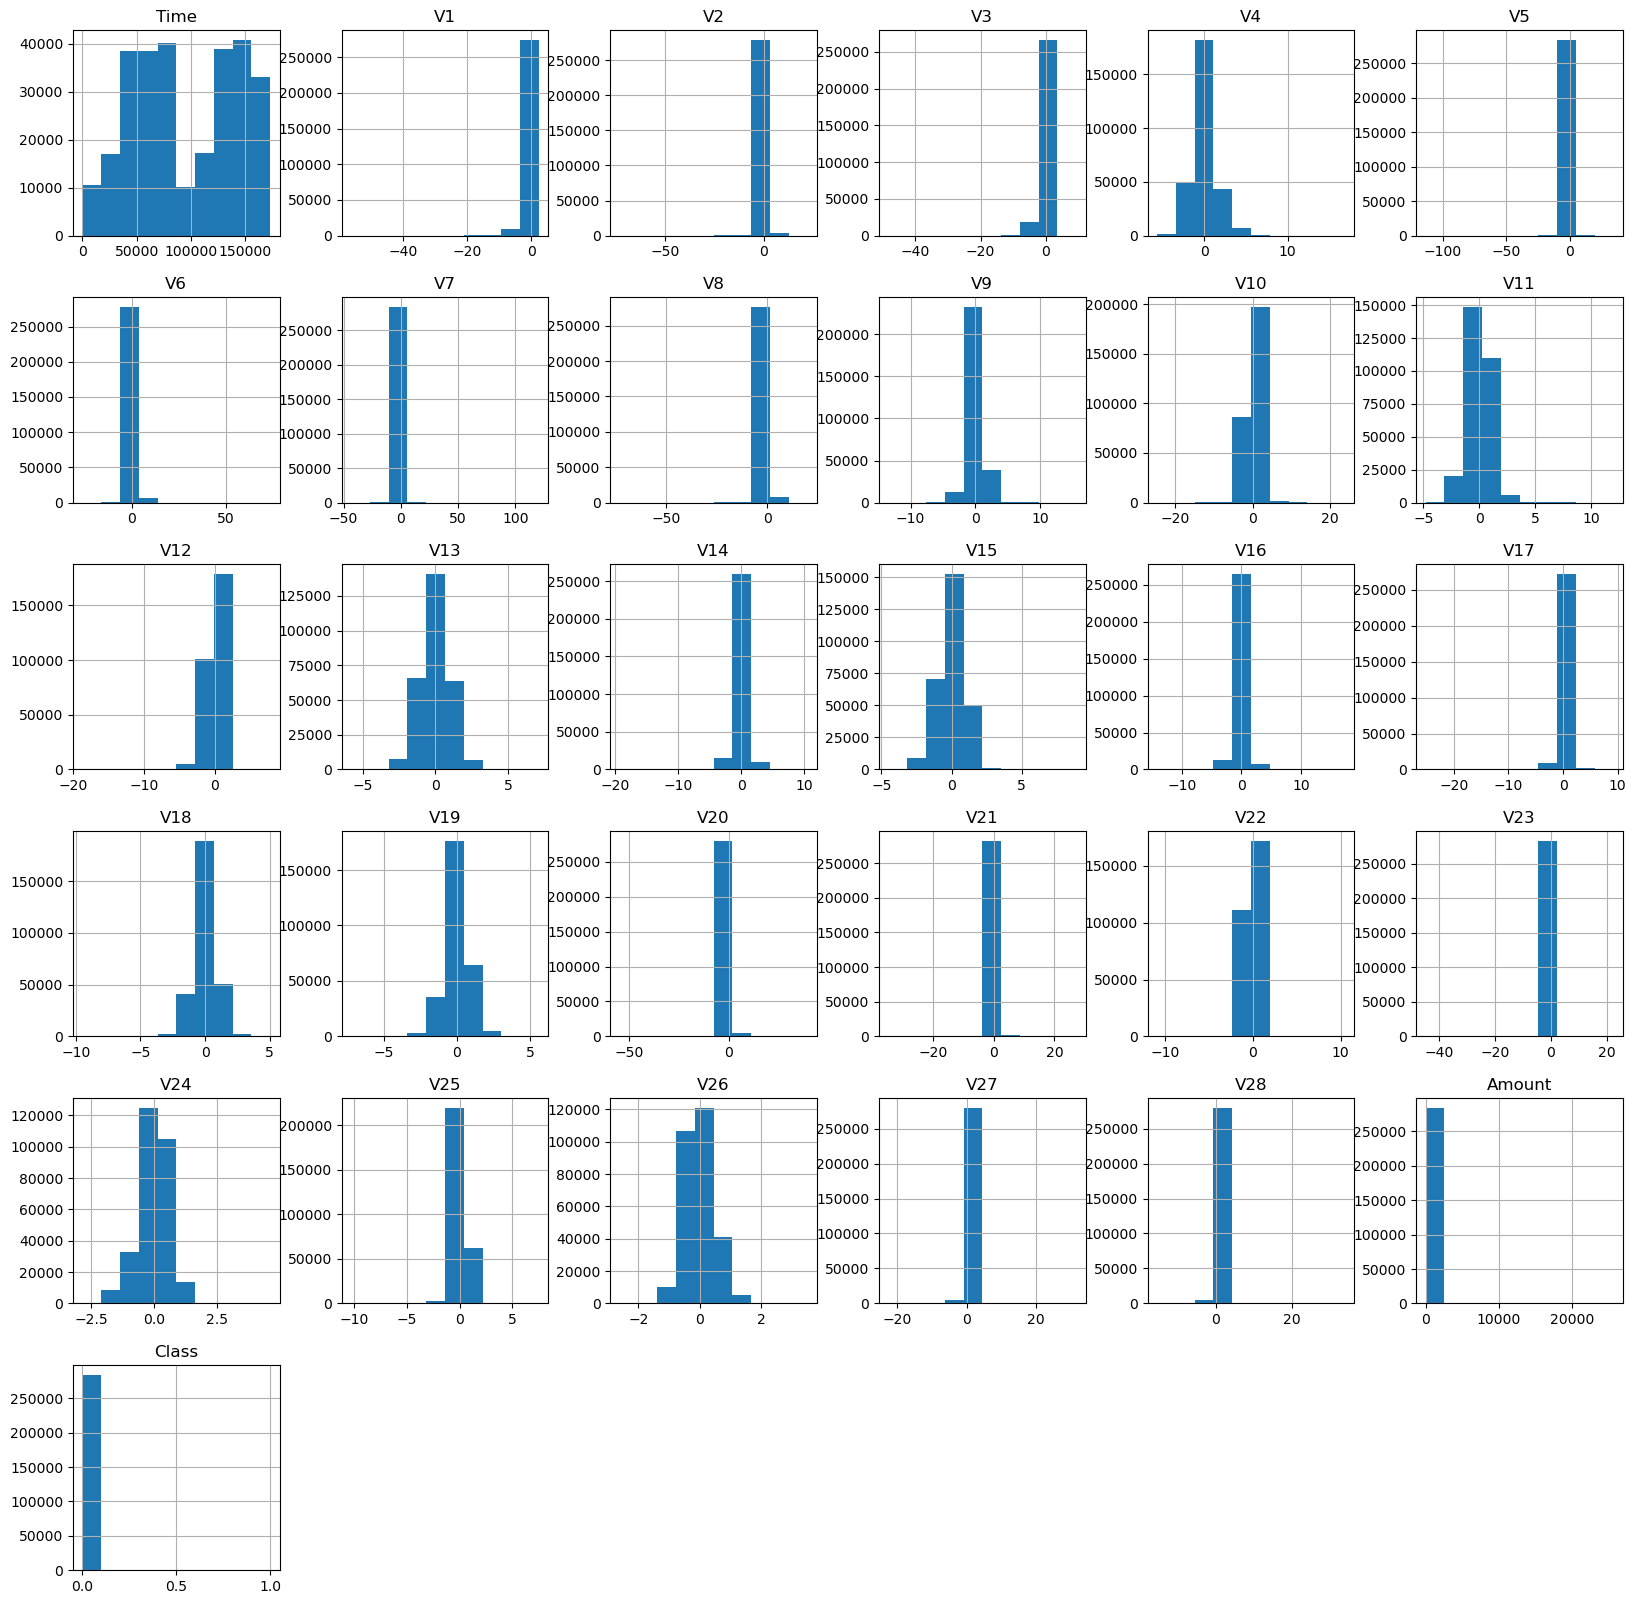

In [72]:
# Visualize histograms of numerical features
df.hist(figsize=(20,20))
plt.show()

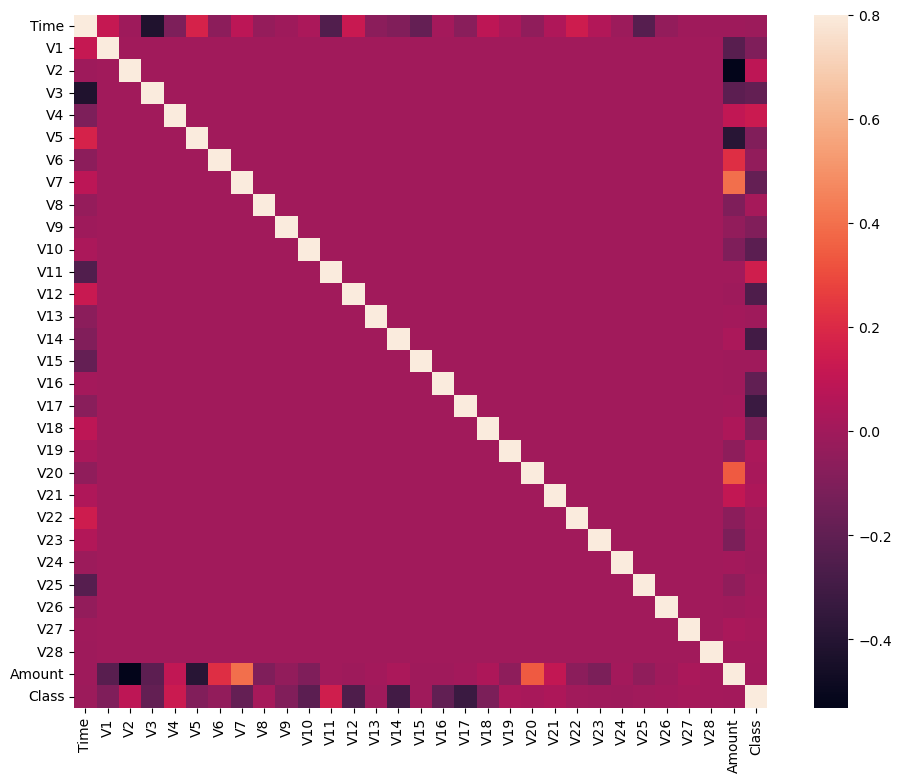

In [73]:
# Visualize correlation matrix as a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.show()

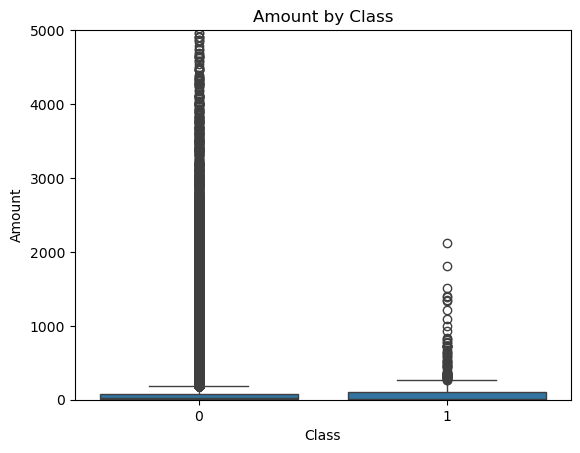

In [74]:
# Visualize boxplot of transaction amount by class
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.ylim(0, 5000)  # Limiting display range for better visibility
plt.show()

In [75]:
# Create a new feature 'Hour' from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

C:\Users\mahee\anaconda3\envs\Jupyter\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


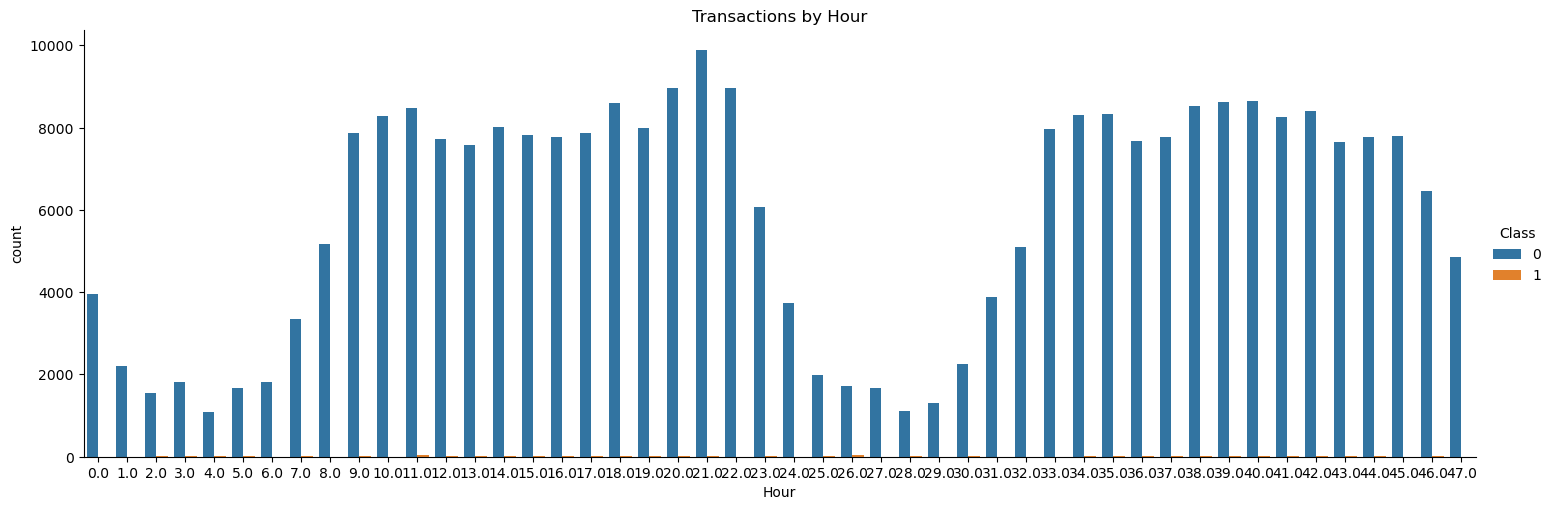

In [76]:
# Visualize transactions by hour
sns.catplot(x='Hour', data=df, kind='count', hue='Class', height=5, aspect=3)
plt.title('Transactions by Hour')
plt.show()

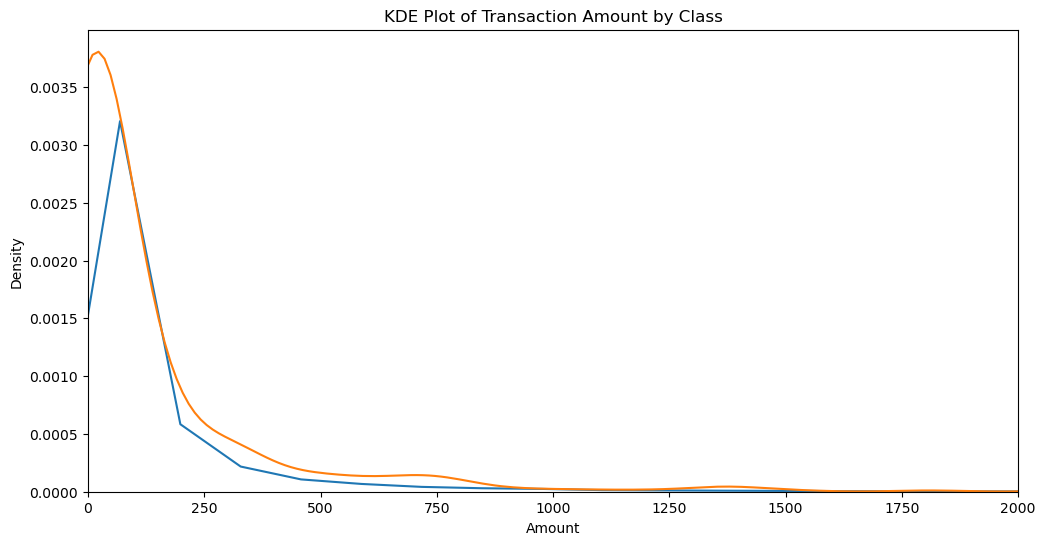

In [77]:
# Visualize KDE plot of transaction amount by class
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Class 0')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Class 1')
plt.title('KDE Plot of Transaction Amount by Class')
plt.xlim(0, 2000)  # Limiting x-axis for better readability
plt.show()

C:\Users\mahee\anaconda3\envs\Jupyter\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


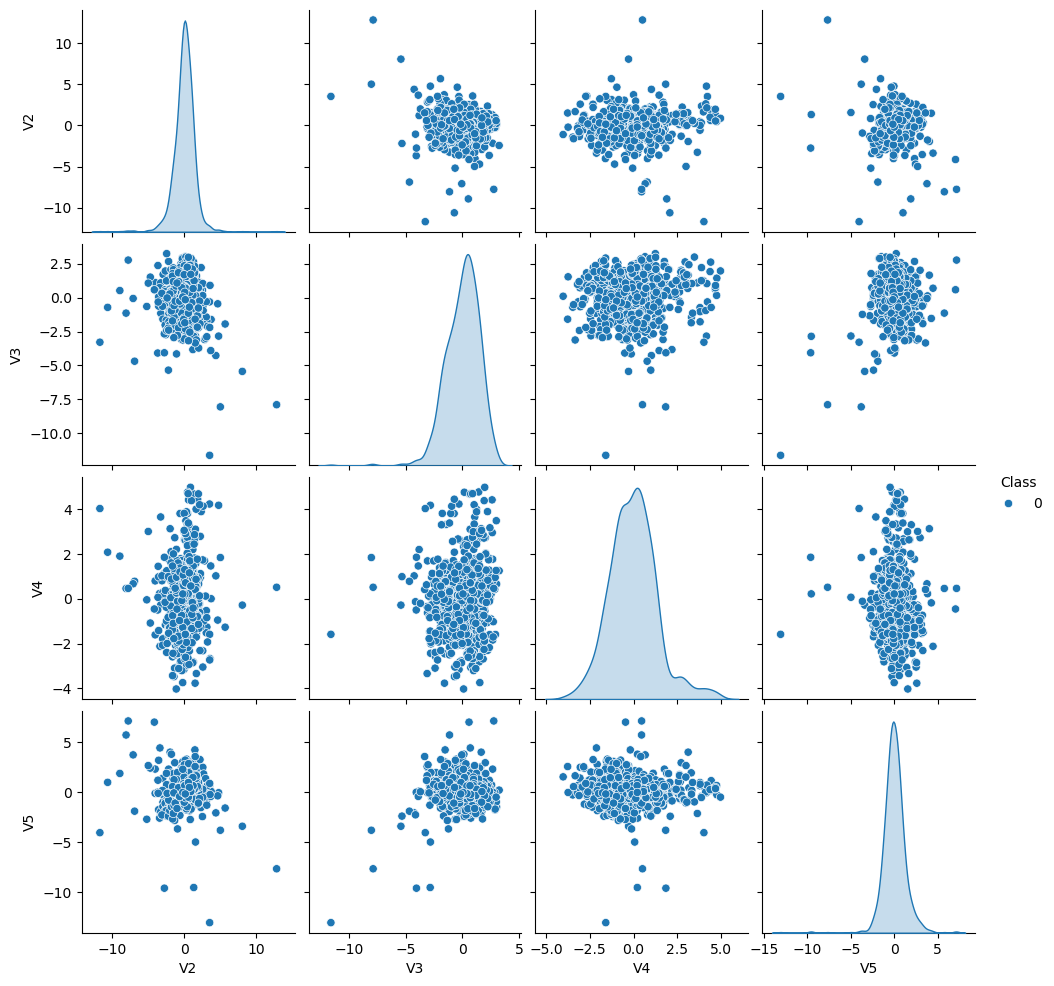

In [78]:
# Visualize pair plot of select features
subset_of_features = ['V2', 'V3', 'V4', 'V5', 'Class']  # Example subset
sns.pairplot(df.sample(1000)[subset_of_features], hue='Class', diag_kind='kde')
plt.show()

# PART 4: Data Preparation

In [79]:
# Split the dataset into train and test sets
X = df.drop('Class', axis=1) # Features
y = df['Class'] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# PART 5: Building and Training Neural Network

In [81]:
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [82]:
# Train Neural Network
nn_model = build_model(X_train_res.shape[1])
nn_model.fit(X_train_res, y_train_res, epochs=10, batch_size=32)

Epoch 1/10
14216/14216 [==============================] - 64s 4ms/step - loss: 0.6767 - accuracy: 0.5705
Epoch 2/10
14216/14216 [==============================] - 60s 4ms/step - loss: 0.6916 - accuracy: 0.5086
Epoch 3/10
14216/14216 [==============================] - 60s 4ms/step - loss: 0.6900 - accuracy: 0.5133
Epoch 4/10
14216/14216 [==============================] - 60s 4ms/step - loss: 0.6913 - accuracy: 0.5075
Epoch 5/10
14216/14216 [==============================] - 56s 4ms/step - loss: 0.6881 - accuracy: 0.5147
Epoch 6/10
14216/14216 [==============================] - 48s 3ms/step - loss: 0.6798 - accuracy: 0.5326
Epoch 7/10
14216/14216 [==============================] - 48s 3ms/step - loss: 0.6904 - accuracy: 0.5083
Epoch 8/10
14216/14216 [==============================] - 48s 3ms/step - loss: 0.6879 - accuracy: 0.5167
Epoch 9/10
14216/14216 [==============================] - 48s 3ms/step - loss: 0.6927 - accuracy: 0.5023
Epoch 10/10
14216/14216 [==============================

# PART 6: Simulated Expert Review Function

In [83]:
def simulate_expert_review(df, sample_size=100, change_threshold=0.7):
    review_sample = df.sample(n=sample_size)
    for index in review_sample.index:
        if np.random.rand() < change_threshold:
            df.at[index, 'Class'] = 1 - df.at[index, 'Class']
    return df


# PART 7: Interactive Data Point Review

In [84]:
def review_data_point(index, features, prediction, actual):
    """
    Display a data point and allow the user to update its label.
    """
    print(f"Features: {features}")
    print(f"Model Prediction: {'Fraud' if prediction else 'Not Fraud'}")
    
    # Dropdown for label selection
    label_dropdown = widgets.Dropdown(
        options=[('Not Fraud', 0), ('Fraud', 1)],
        value=actual,
        description='Label:',
    )
    
    # Button to submit the change
    submit_button = widgets.Button(description="Update Label")

    def on_submit_button_clicked(b):
        # Update the dataset with the new label
        df.at[index, 'Class'] = label_dropdown.value
        print(f"Label for index {index} updated to: {'Fraud' if label_dropdown.value else 'Not Fraud'}")
        
    submit_button.on_click(on_submit_button_clicked)
    
    display(label_dropdown, submit_button)

# Example usage
index_to_review = 0
features = df.drop('Class', axis=1).iloc[index_to_review]

# Use nn_model for prediction, as it's the trained model
prediction = nn_model.predict(np.array([features]))[0]  # Convert features to a 2D array as expected by the model

# Convert prediction to a binary label
predicted_label = 1 if prediction > 0.5 else 0

actual_label = df['Class'].iloc[index_to_review]

review_data_point(index_to_review, features, predicted_label, actual_label)


1/1 [==============================] - 0s 157ms/step
Features: Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Hour        0.000000
Name: 0, dtype: float64
Model Prediction: Not Fraud


Dropdown(description='Label:', options=(('Not Fraud', 0), ('Fraud', 1)), value=0)

Button(description='Update Label', style=ButtonStyle())

Label for index 0 updated to: Not Fraud
Label for index 0 updated to: Not Fraud
Label for index 0 updated to: Fraud


# PART 8: Model Evaluation with Simulated Review

Epoch 1/10
14205/14205 [==============================] - 53s 4ms/step - loss: 0.6898 - accuracy: 0.5328
Epoch 2/10
14205/14205 [==============================] - 50s 4ms/step - loss: 0.6912 - accuracy: 0.5137
Epoch 3/10
14205/14205 [==============================] - 51s 4ms/step - loss: 0.6924 - accuracy: 0.5063
Epoch 4/10
14205/14205 [==============================] - 50s 3ms/step - loss: 0.6931 - accuracy: 0.5013
Epoch 5/10
14205/14205 [==============================] - 50s 3ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 6/10
14205/14205 [==============================] - 49s 3ms/step - loss: 0.6928 - accuracy: 0.5047
Epoch 7/10
14205/14205 [==============================] - 49s 3ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 8/10
14205/14205 [==============================] - 48s 3ms/step - loss: 0.6927 - accuracy: 0.5033
Epoch 9/10
14205/14205 [==============================] - 48s 3ms/step - loss: 0.6906 - accuracy: 0.5096
Epoch 10/10
1781/1781 [==============================] 

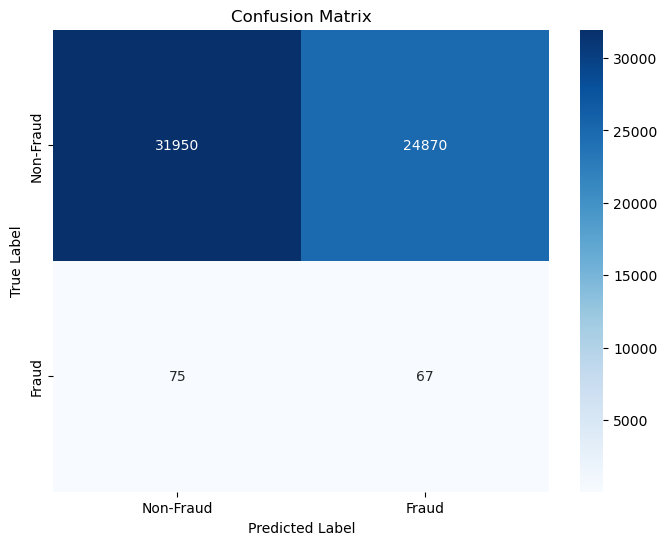

Epoch 1/10
14202/14202 [==============================] - 49s 3ms/step - loss: 0.6904 - accuracy: 0.5316
Epoch 2/10
14202/14202 [==============================] - 49s 3ms/step - loss: 0.6904 - accuracy: 0.5199
Epoch 3/10
14202/14202 [==============================] - 47s 3ms/step - loss: 0.6911 - accuracy: 0.5133
Epoch 4/10
14202/14202 [==============================] - 47s 3ms/step - loss: 0.6912 - accuracy: 0.5113
Epoch 5/10
14202/14202 [==============================] - 48s 3ms/step - loss: 0.6931 - accuracy: 0.5007
Epoch 6/10
14202/14202 [==============================] - 47s 3ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 7/10
14202/14202 [==============================] - 48s 3ms/step - loss: 0.6931 - accuracy: 0.5022
Epoch 8/10
14202/14202 [==============================] - 47s 3ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 9/10
14202/14202 [==============================] - 47s 3ms/step - loss: 0.6931 - accuracy: 0.5017
Epoch 10/10
1781/1781 [==============================] 

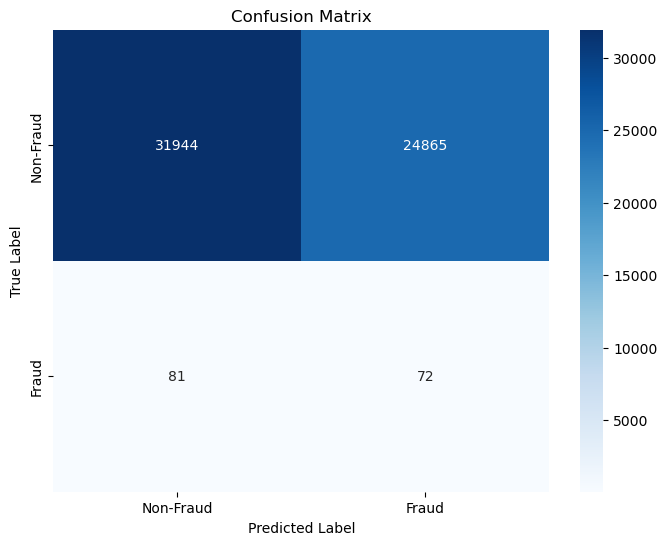

In [92]:
for iteration in range(2):  # Number of iterations
    # Simulate expert review
    df = simulate_expert_review(df)

    # Update training and test sets
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Rebuild and retrain the model
    nn_model_simulated = build_model(X_train_res.shape[1])
    nn_model_simulated.fit(X_train_res, y_train_res, epochs=10, batch_size=32)

    # Predict on the test set
    y_pred = nn_model.predict(X_test) > 0.5

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Iteration {iteration + 1}: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    
    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [93]:
# Function to evaluate and return model metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test) > 0.5
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [94]:
# Evaluating the model post simulated review
accuracy_sim, precision_sim, recall_sim, f1_sim = evaluate_model(nn_model_simulated, X_test, y_test)
print("Evaluation Metrics for Simulated Review:")
print(f"Accuracy: {accuracy_sim}, Precision: {precision_sim}, Recall: {recall_sim}, F1 Score: {f1_sim}\n")


1781/1781 [==============================] - 3s 2ms/step
Evaluation Metrics for Simulated Review:
Accuracy: 0.9511604227379656, Precision: 0.005641218503196691, Recall: 0.09803921568627451, F1 Score: 0.010668563300142249



# PART 9: Model Evaluation with Manual Review

In [101]:
def manual_review(df, batch_size=10):
    indices = df.sample(n=batch_size).index
    predictions = nn_model.predict(df.loc[indices, df.columns != 'Class'])

    label_dropdowns = [widgets.Dropdown(options=[('Not Fraud', 0), ('Fraud', 1)], 
                                        value=int(pred > 0.5), 
                                        description=f'Index {index}:') for index, pred in zip(indices, predictions)]

    update_button = widgets.Button(description="Confirm Labels")

    def on_update_button_clicked(b):
        for i in range(batch_size):
            index = indices[i]
            df.at[index, 'Class'] = label_dropdowns[i].value
        print("Labels updated.")

    update_button.on_click(on_update_button_clicked)

    display(*label_dropdowns, update_button)

# Initiate manual review process
manual_review(df)


1/1 [==============================] - 0s 63ms/step


C:\Users\mahee\AppData\Local\Temp\ipykernel_2584\3128483357.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  value=int(pred > 0.5),


Dropdown(description='Index 23467:', index=1, options=(('Not Fraud', 0), ('Fraud', 1)), value=1)

Dropdown(description='Index 167229:', options=(('Not Fraud', 0), ('Fraud', 1)), value=0)

Dropdown(description='Index 98888:', index=1, options=(('Not Fraud', 0), ('Fraud', 1)), value=1)

Dropdown(description='Index 72172:', index=1, options=(('Not Fraud', 0), ('Fraud', 1)), value=1)

Dropdown(description='Index 152321:', options=(('Not Fraud', 0), ('Fraud', 1)), value=0)

Dropdown(description='Index 180380:', options=(('Not Fraud', 0), ('Fraud', 1)), value=0)

Dropdown(description='Index 21328:', index=1, options=(('Not Fraud', 0), ('Fraud', 1)), value=1)

Dropdown(description='Index 254579:', options=(('Not Fraud', 0), ('Fraud', 1)), value=0)

Dropdown(description='Index 123480:', index=1, options=(('Not Fraud', 0), ('Fraud', 1)), value=1)

Dropdown(description='Index 121233:', index=1, options=(('Not Fraud', 0), ('Fraud', 1)), value=1)

Button(description='Confirm Labels', style=ButtonStyle())

Epoch 1/10
14201/14201 [==============================] - 50s 3ms/step - loss: 0.6900 - accuracy: 0.5387
Epoch 2/10
14201/14201 [==============================] - 47s 3ms/step - loss: 0.6916 - accuracy: 0.5117
Epoch 3/10
14201/14201 [==============================] - 48s 3ms/step - loss: 0.6922 - accuracy: 0.5088
Epoch 4/10
14201/14201 [==============================] - 48s 3ms/step - loss: 0.6929 - accuracy: 0.5020
Epoch 5/10
14201/14201 [==============================] - 48s 3ms/step - loss: 0.6920 - accuracy: 0.5082
Epoch 6/10
14201/14201 [==============================] - 47s 3ms/step - loss: 0.6919 - accuracy: 0.5063
Epoch 7/10
14201/14201 [==============================] - 46s 3ms/step - loss: 0.6908 - accuracy: 0.5106
Epoch 8/10
14201/14201 [==============================] - 48s 3ms/step - loss: 0.6931 - accuracy: 0.5019
Epoch 9/10
14201/14201 [==============================] - 47s 3ms/step - loss: 0.6921 - accuracy: 0.5080
Epoch 10/10
1781/1781 [==============================] 

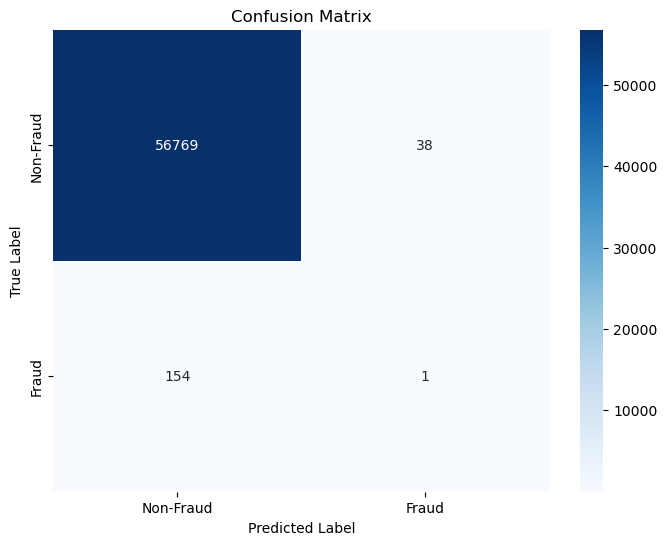

In [98]:

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

nn_model_manual = build_model(X_train_res.shape[1])
nn_model_manual.fit(X_train_res, y_train_res, epochs=10, batch_size=32)

# Evaluate the model
accuracy_man, precision_man, recall_man, f1_man = evaluate_model(nn_model_manual, X_test, y_test)
print("Evaluation Metrics for Manual Review:")
print(f"Accuracy: {accuracy_man}, Precision: {precision_man}, Recall: {recall_man}, F1 Score: {f1_man}\n")

# Confusion Matrix Visualization
y_pred = nn_model_manual.predict(X_test) > 0.5
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




# PART 10: Model Performance: Simulated vs Manual Review

In [99]:
# Creating a DataFrame to hold the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Simulated Review': [accuracy_sim, precision_sim, recall_sim, f1_sim],
    'Manual Review': [accuracy_man, precision_man, recall_man, f1_man]
})

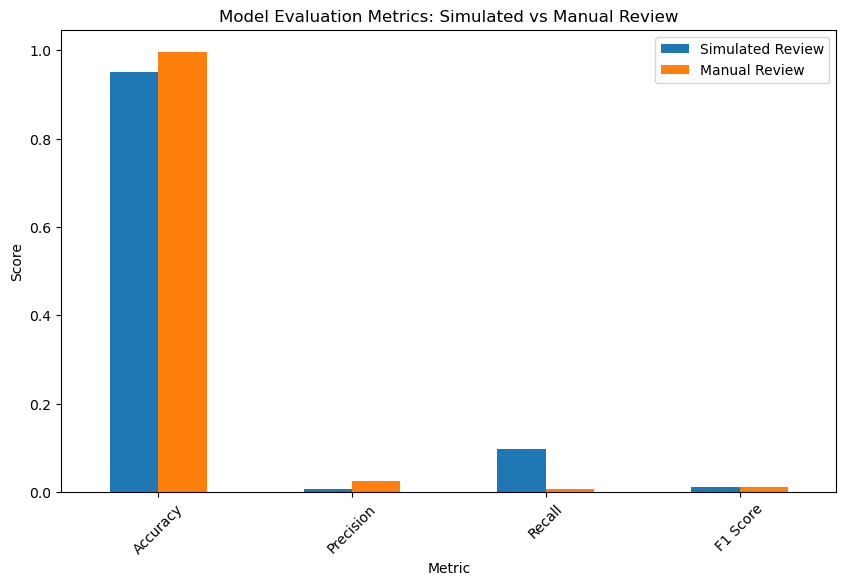

In [100]:
# Visualizing the comparison
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10,6))
plt.title('Model Evaluation Metrics: Simulated vs Manual Review')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()